In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [3]:
IMG_SIZE = 50
DATA_DIR = 'C:/Users/naveena/Downloads/archive (2)/Rice_Image_Dataset'
RICE = ['Karacadag', 'Jasmine', 'Ipsala', 'Basmati', 'Arborio']

In [4]:
label_encoder = LabelEncoder()

In [6]:
def load_data():
    images = []
    labels = []

    for type_label, rice_type in enumerate(RICE):
        n = 0
        rice_type_dir = os.path.join(DATA_DIR, str(rice_type))
        if os.path.isdir(rice_type_dir):
            for img_file in os.listdir(rice_type_dir):
                img_path = os.path.join(rice_type_dir, str(img_file))
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(type_label)
                n += 1
                if n >= 13000:
                  break  # Assigning label based on index
        else:
            print(f"Directory not found for rice_type {rice_type}: {rice_type_dir}")

    return np.array(images), np.array(labels)

images, labels = load_data()

In [7]:
# Normalize images
images = images / 255.0

# Encode labels to categorical
labels_categorical = to_categorical(labels, num_classes=len(RICE))

In [8]:
print("Distribution of rice_types:")
print(pd.Series(labels).value_counts())

Distribution of rice_types:
0    13000
1    13000
2    13000
3    13000
4    13000
dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [10]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(RICE), activation='softmax')  # Ensure the correct number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))

Epoch 1/4
1625/1625 [==============================] - 133s 81ms/step - loss: 0.2626 - accuracy: 0.9007 - val_loss: 0.1042 - val_accuracy: 0.9653
Epoch 2/4
1625/1625 [==============================] - 142s 87ms/step - loss: 0.1413 - accuracy: 0.9533 - val_loss: 0.0845 - val_accuracy: 0.9704
Epoch 3/4
1625/1625 [==============================] - 135s 83ms/step - loss: 0.1207 - accuracy: 0.9609 - val_loss: 0.0771 - val_accuracy: 0.9739
Epoch 4/4
1625/1625 [==============================] - 175s 108ms/step - loss: 0.1028 - accuracy: 0.9670 - val_loss: 0.0589 - val_accuracy: 0.9802


In [14]:
path = "C:/Users/naveena/Downloads/Arborio - test.jpg"
img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
x = img_resized / 255.0
x = np.expand_dims(x, axis=0)

image_tensor = np.vstack([x])
y_pred = model.predict(image_tensor)
y_pred_classes = np.argmax(y_pred, axis=1)
print(RICE[y_pred_classes[0]])

1/1 [==============================] - 0s 16ms/step
Arborio


In [15]:
TEST_DIR = 'C:/Users/naveena/Downloads/archive (2)/Test_data'

In [17]:
def load_data():
    images = []
    labels = []

    for type_label, rice_type in enumerate(RICE):
        n = 0
        rice_type_dir = os.path.join(TEST_DIR, str(rice_type))
        if os.path.isdir(rice_type_dir):
            for img_file in os.listdir(rice_type_dir):
                img_path = os.path.join(rice_type_dir, str(img_file))
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(type_label)
                n += 1
                if n >= 2000:
                  break  # Assigning label based on index
        else:
            print(f"Directory not found for rice_type {rice_type}: {rice_type_dir}")

    return np.array(images), np.array(labels)

images_test, labels_test = load_data()

In [18]:
# Normalize images
images_test = images_test / 255.0

# Encode labels to categorical
labels_test_categorical = to_categorical(labels_test, num_classes=len(RICE))

In [19]:
print("Distribution of rice_types:")
print(pd.Series(labels_test).value_counts())

Distribution of rice_types:
0    2000
1    2000
2    2000
3    2000
4    2000
dtype: int64


313/313 [==============================] - 2s 6ms/step


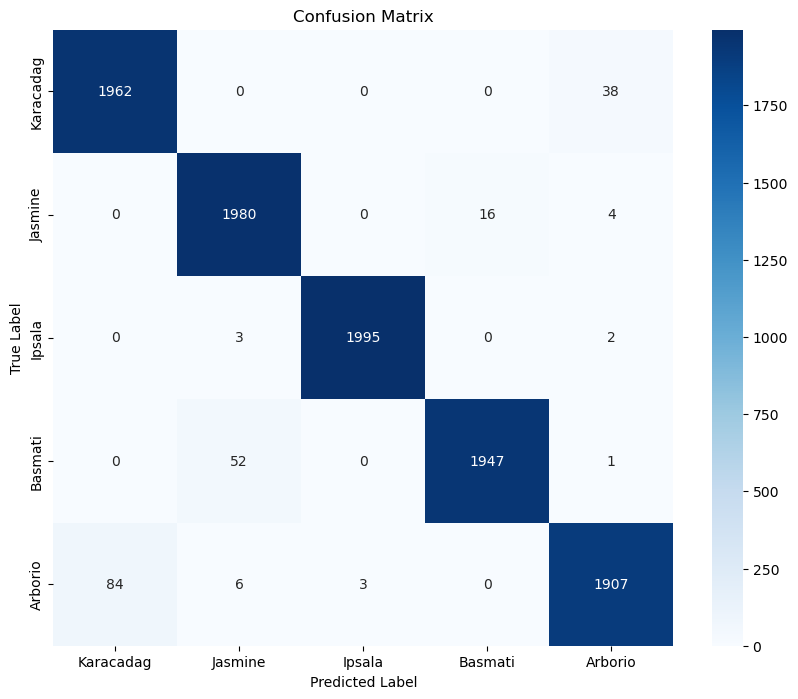

              precision    recall  f1-score   support

   Karacadag       0.96      0.98      0.97      2000
     Jasmine       0.97      0.99      0.98      2000
      Ipsala       1.00      1.00      1.00      2000
     Basmati       0.99      0.97      0.98      2000
     Arborio       0.98      0.95      0.97      2000

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [20]:
import seaborn as sns
# Model Evaluation
y_pred = model.predict(images_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(labels_test_categorical, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm_df = pd.DataFrame(cm, index=RICE, columns=RICE)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=RICE)
print(report)